Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 106ms/step - accuracy: 0.7599 - loss: 0.7813 - val_accuracy: 0.9772 - val_loss: 0.0841
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9630 - loss: 0.1199 - val_accuracy: 0.9852 - val_loss: 0.0578
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9735 - loss: 0.0861 - val_accuracy: 0.9870 - val_loss: 0.0462
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9772 - loss: 0.0714 - val_accuracy: 0.9902 - val_loss: 0.0379
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.9805 - loss: 0.0634 - val_accuracy: 0.9892 - val_loss: 0.0375
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 111ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9852 - loss: 0.0497 - val_accuracy: 0.9913 - val_loss: 0.0354
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.9869 - loss: 0

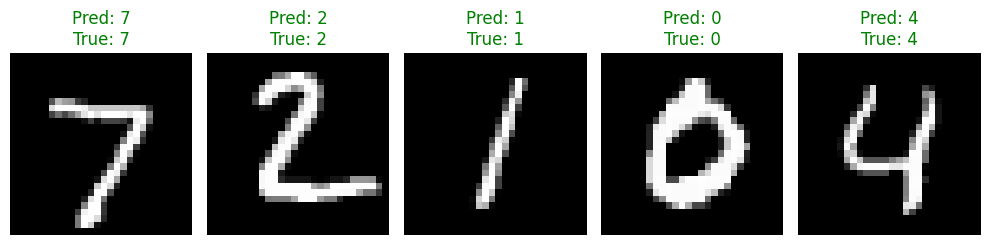

In [51]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
batch_size = 128
epochs = 15
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot some example predictions
def plot_examples(images, predictions, true_labels, num_examples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(true_labels[i])
        title = f"Pred: {pred_label}\nTrue: {true_label}"
        if pred_label == true_label:
            plt.title(title, color='g')
        else:
            plt.title(title, color='r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get predictions for the first 5 test images
predictions = model.predict(x_test[:5])
plot_examples(x_test[:5], predictions, y_test[:5])

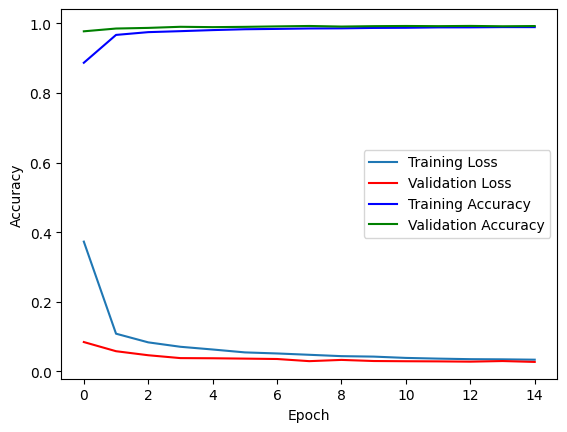

In [52]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
from IPython.display import HTML, display
import base64
import io
import numpy as np
from PIL import Image
from google.colab import output
import matplotlib.pyplot as plt

canvas_html = """
<div style="text-align:center">
<canvas id="canvas" width="200" height="200" style="border:1px solid black; background:black;"></canvas>
<br/>
<button onclick="predict()">Predict</button>
<button onclick="clearCanvas()">Clear</button>
</div>
<script>
var canvas = document.getElementById('canvas');
var ctx = canvas.getContext('2d');
var drawing = false;
var lastX = 0;
var lastY = 0;

ctx.lineWidth = 10;
ctx.lineJoin = 'round';
ctx.lineCap = 'round';

ctx.fillStyle = "black"; // Set fill style to black for clearing
ctx.fillRect(0, 0, canvas.width, canvas.height); // Fill canvas with black initially
ctx.strokeStyle = "white"; // Set stroke style to white for drawing

function startDrawing(e) {
    drawing = true;
    [lastX, lastY] = [e.offsetX, e.offsetY];
}

function draw(e) {
    if (!drawing) return;
    ctx.beginPath();
    ctx.moveTo(lastX, lastY);
    ctx.lineTo(e.offsetX, e.offsetY);
    ctx.stroke();
    [lastX, lastY] = [e.offsetX, e.offsetY];
}

function stopDrawing() {
    drawing = false;
}

canvas.addEventListener('mousedown', startDrawing);
canvas.addEventListener('mousemove', draw);
canvas.addEventListener('mouseup', stopDrawing);
canvas.addEventListener('mouseout', stopDrawing);

function clearCanvas() {
    ctx.fillStyle = "black";
    ctx.fillRect(0, 0, canvas.width, canvas.height);
    ctx.fillStyle = "white";
    ctx.strokeStyle = "white";
}

function predict() {
    var data = canvas.toDataURL('image/png');
    google.colab.kernel.invokeFunction('notebook.predict_digit', [data], {});
}
</script>
"""

display(HTML(canvas_html))

def preprocess_image(img):
    img = img.convert('L') # Convert to grayscale first for easier processing
    img_array = np.array(img)

    # Find bounding box of non-white pixels
    non_white_pixels = np.where(img_array < 255)
    y_min, x_min = np.min(non_white_pixels[0]), np.min(non_white_pixels[1])
    y_max, x_max = np.max(non_white_pixels[0]), np.max(non_white_pixels[1])

    # Crop the image
    cropped_img_array = img_array[y_min:y_max+1, x_min:x_max+1]
    cropped_img = Image.fromarray(cropped_img_array)

    # Resize and center the cropped image on a 28x28 white background
    size = max(cropped_img.size)
    new_img = Image.new('L', (size, size), color=255)
    new_img.paste(cropped_img, ((size - cropped_img.size[0]) // 2, (size - cropped_img.size[1]) // 2))
    new_img = new_img.resize((28, 28))

    img_array = np.array(new_img)
    img_array = 255 - img_array  # inverti colori per MNIST
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, -1)

    return np.expand_dims(img_array, 0)

def predict_digit(data):
    data = data.split(',')[1]
    binary = base64.b64decode(data)
    img = Image.open(io.BytesIO(binary))
    processed_img = preprocess_image(img)
    prediction = model.predict(processed_img)
    digit = np.argmax(prediction)
    confidence = np.max(prediction)
    display(HTML(f"<h2>Predicted: {digit} (Confidence: {confidence:.2%})</h2>"))
    plt.figure(figsize=(6,3))
    plt.bar(range(10), prediction[0])
    plt.xticks(range(10))
    plt.title('Prediction Probabilities')
    plt.show()

output.register_callback('notebook.predict_digit', predict_digit)
